In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.layers import LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

<h1>Read Datasets<h1>

In [2]:
df = pd.read_excel('Datasets_Final.xlsx')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4140 non-null   int64 
 1   text_emoji  4140 non-null   object
 2   Sarcasm     4140 non-null   object
dtypes: int64(1), object(2)
memory usage: 97.2+ KB


,Unnamed: 0,text_emoji,Sarcasm
0,0,mencemooh putus asa marah sejenis menekankan s...,Positif
1,1,jagat jagat mengenal tuhan mengenal mengenal m 😨,Positif
2,2,mbah nun s b yudhoyono j k kubu negarawan poli...,Positif
3,3,mbah nun banci komunis sengkuni sembunyi akun ...,Positif
4,4,mbah nun berlagak sandiwara silakan baca foto ...,Negatif


In [48]:
# Remove unused column/feature
df = df.drop(columns='Unnamed: 0')

In [49]:
df.head()

,text_emoji,Sarcasm
0,mencemooh putus asa marah sejenis menekankan s...,Positif
1,jagat jagat mengenal tuhan mengenal mengenal m 😨,Positif
2,mbah nun s b yudhoyono j k kubu negarawan poli...,Positif
3,mbah nun banci komunis sengkuni sembunyi akun ...,Positif
4,mbah nun berlagak sandiwara silakan baca foto ...,Negatif


In [50]:
print(f'Total Duplicated Data: {df.duplicated().sum()}')

Total Duplicated Data: 209


In [51]:
df = df.drop_duplicates(ignore_index = True)

In [52]:
print(f'Total Duplicated Data After Handling: {df.duplicated().sum()}')

Total Duplicated Data After Handling: 0


In [53]:
print(f'Total Missing Value: \n{df.isnull().sum()}')

Total Missing Value: 
text_emoji    0
Sarcasm       0
dtype: int64


In [54]:
df['Sarcasm'] = df['Sarcasm'].replace('Positif', 1)
df['Sarcasm'] = df['Sarcasm'].replace('Negatif', 0)

In [55]:
print(df['Sarcasm'].value_counts())

0    2013
1    1918
Name: Sarcasm, dtype: int64


<h1>Splitting Data</h1>

In [56]:
X = df['text_emoji'].values
y = df['Sarcasm'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

<h1>Tokenization</h1>

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer

maxlen = 100
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)

In [59]:
word_index = tokenizer.word_index

In [60]:
word_index

{'<OOV>': 1,
 'luhut': 2,
 '👍': 3,
 '💩': 4,
 'indonesia': 5,
 'cak': 6,
 '💯': 7,
 'nun': 8,
 '😁': 9,
 'binsar': 10,
 'puan': 11,
 'presiden': 12,
 'orang': 13,
 '😠': 14,
 'jokowi': 15,
 'partai': 16,
 '😊': 17,
 'rakyat': 18,
 'anies': 19,
 'maharani': 20,
 '😨': 21,
 'bu': 22,
 'ganjar': 23,
 'prabowo': 24,
 '😭': 25,
 'menteri': 26,
 'pemimpin': 27,
 '👎': 28,
 'semoga': 29,
 'aja': 30,
 'negara': 31,
 'masyarakat': 32,
 'baswedan': 33,
 '💕': 34,
 '2024': 35,
 'ga': 36,
 'calon': 37,
 'anak': 38,
 'politik': 39,
 '😔': 40,
 'bangsa': 41,
 'perjuangan': 42,
 'kalo': 43,
 '✌': 44,
 'firaun': 45,
 'ketua': 46,
 'demokrasi': 47,
 'israel': 48,
 'banget': 49,
 'kerja': 50,
 'jakarta': 51,
 'mbak': 52,
 'capres': 53,
 'lucu': 54,
 '1': 55,
 'salah': 56,
 'beliau': 57,
 'nama': 58,
 'investasi': 59,
 '😴': 60,
 'sih': 61,
 'cocok': 62,
 'ri': 63,
 'program': 64,
 'dunia': 65,
 'kadrun': 66,
 'biar': 67,
 'nih': 68,
 'dg': 69,
 'negeri': 70,
 'keren': 71,
 'pilpres': 72,
 'masuk': 73,
 'bidang': 7

<h1>Sequence</h1>

In [61]:
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

<h1>Padding</h1>

In [62]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_padded = pad_sequences(sequence_train, maxlen=100, padding='post', truncating='post')
X_test_padded = pad_sequences(sequence_test, maxlen=100, padding='post', truncating='post')

In [63]:
X_train_padded[0]

array([499,  31, 313, 401, 124, 434, 124, 167, 198, 591,  40,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])

<h1>Build Matrix Embedding</h1>

In [64]:
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

def load_embedding(file):
    embeddings_index = dict(get_coefs(*i.split(" ")) for i in open(file, encoding='utf-8'))
    
    return embeddings_index

In [65]:
def make_embedding_matrix(embedding, tokenizer, len_voc):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    # embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    embedding_matrix = np.zeros((len_voc + 1, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [66]:
glove_50D = load_embedding('Misc/Embeddings/embeddings50D_300E.txt')
glove_100D = load_embedding('Misc/Embeddings/embeddings100D_300E.txt')
glove_150D = load_embedding('Misc/Embeddings/embeddings150D_300E.txt')

<h1>Implement SMOTE</h1>

In [67]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train)

In [68]:
unique_values, value_counts = np.unique(y_train_resampled, return_counts=True)

In [69]:
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

0: 1804
1: 1804


In [70]:
embed_matrix_50D = make_embedding_matrix(glove_50D, tokenizer, len(word_index))
embed_matrix_100D = make_embedding_matrix(glove_100D, tokenizer, len(word_index))
embed_matrix_150D = make_embedding_matrix(glove_150D, tokenizer, len(word_index))

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [71]:
print(f'Dimension matrix 50D: {embed_matrix_50D.shape}\n')
print(f'Dimension matrix 100D : {embed_matrix_100D.shape}\n')
print(f'Dimension matrix 150D : {embed_matrix_150D.shape}\n')

Dimension matrix 50D: (6237, 50)

Dimension matrix 100D : (6237, 100)

Dimension matrix 150D : (6237, 150)



<h1>Create Bi-LSTM Architecture</h1>

In [27]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.8): #logs.get('val_accuracy')>0.8
      print("\nAkurasi telah mencapai > 75%!")
      self.model.stop_training = True
callbacks = myCallback()

<h2>Train Model Bi-LSTM (Parameter embedding_size = 50)</h2>

In [27]:
model_bilstm_embedsize_50 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_50D.shape[0], embed_matrix_50D.shape[1], input_length=maxlen, weights=[embed_matrix_50D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_embedsize_50.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_embedsize_50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           311850    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              120800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 445,579
Trainable params: 133,729
Non-trainable params: 311,850
____________________________________________

In [28]:
history_bilstm_embedsize_50 = model_bilstm_embedsize_50.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=10,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/10
113/113 - 9s - loss: 0.6613 - accuracy: 0.5984 - val_loss: 0.5564 - val_accuracy: 0.7157 - 9s/epoch - 76ms/step
Epoch 2/10
113/113 - 5s - loss: 0.5960 - accuracy: 0.6890 - val_loss: 0.5200 - val_accuracy: 0.7284 - 5s/epoch - 42ms/step
Epoch 3/10
113/113 - 5s - loss: 0.5612 - accuracy: 0.7045 - val_loss: 0.4684 - val_accuracy: 0.7589 - 5s/epoch - 41ms/step
Epoch 4/10
113/113 - 5s - loss: 0.5502 - accuracy: 0.7151 - val_loss: 0.4705 - val_accuracy: 0.7563 - 5s/epoch - 41ms/step
Epoch 5/10
113/113 - 5s - loss: 0.5383 - accuracy: 0.7228 - val_loss: 0.4699 - val_accuracy: 0.7462 - 5s/epoch - 40ms/step
Epoch 6/10
113/113 - 5s - loss: 0.5342 - accuracy: 0.7215 - val_loss: 0.4628 - val_accuracy: 0.7614 - 5s/epoch - 40ms/step
Epoch 7/10
113/113 - 4s - loss: 0.5243 - accuracy: 0.7262 - val_loss: 0.4491 - val_accuracy: 0.7640 - 4s/epoch - 40ms/step
Epoch 8/10
113/113 - 5s - loss: 0.5093 - accuracy: 0.7406 - val_loss: 0.4532 - val_accuracy: 0.7843 - 5s/epoch - 40ms/step
Epoch 9/10
113/1

<h2>Train Model Bi-LSTM (Parameter embedding_size = 100)</h2>

In [29]:
model_bilstm_embedsize_100 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_embedsize_100.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_embedsize_100.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          623700    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                12864     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 797,429
Trainable params: 173,729
Non-trainable params: 623,700
__________________________________________

In [30]:
history_bilstm_embedsize_100 = model_bilstm_embedsize_100.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=10,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/10
113/113 - 8s - loss: 0.6471 - accuracy: 0.6059 - val_loss: 0.5385 - val_accuracy: 0.7487 - 8s/epoch - 75ms/step
Epoch 2/10
113/113 - 5s - loss: 0.5694 - accuracy: 0.7051 - val_loss: 0.5041 - val_accuracy: 0.7665 - 5s/epoch - 43ms/step
Epoch 3/10
113/113 - 5s - loss: 0.5440 - accuracy: 0.7173 - val_loss: 0.4676 - val_accuracy: 0.7766 - 5s/epoch - 43ms/step
Epoch 4/10
113/113 - 5s - loss: 0.5294 - accuracy: 0.7323 - val_loss: 0.4636 - val_accuracy: 0.7716 - 5s/epoch - 43ms/step
Epoch 5/10
113/113 - 5s - loss: 0.5201 - accuracy: 0.7359 - val_loss: 0.4536 - val_accuracy: 0.7640 - 5s/epoch - 43ms/step
Epoch 6/10
113/113 - 5s - loss: 0.5073 - accuracy: 0.7467 - val_loss: 0.4903 - val_accuracy: 0.7513 - 5s/epoch - 43ms/step
Epoch 7/10
113/113 - 5s - loss: 0.4950 - accuracy: 0.7539 - val_loss: 0.4594 - val_accuracy: 0.7665 - 5s/epoch - 43ms/step
Epoch 8/10
113/113 - 5s - loss: 0.5006 - accuracy: 0.7425 - val_loss: 0.4604 - val_accuracy: 0.7538 - 5s/epoch - 43ms/step
Epoch 9/10
113/1

<h2>Train Model Bi-LSTM (Parameter embedding_size = 150)</h2>

In [31]:
model_bilstm_embedsize_150 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_embedsize_150.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_embedsize_150.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 150)          935550    
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              200800    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                12864     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,149,279
Trainable params: 213,729
Non-trainable params: 935,550
________________________________________

In [32]:
history_bilstm_embedsize_150 = model_bilstm_embedsize_150.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=10,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/10
113/113 - 9s - loss: 0.6513 - accuracy: 0.6053 - val_loss: 0.5312 - val_accuracy: 0.7640 - 9s/epoch - 76ms/step
Epoch 2/10
113/113 - 5s - loss: 0.5697 - accuracy: 0.7142 - val_loss: 0.4662 - val_accuracy: 0.7843 - 5s/epoch - 48ms/step
Epoch 3/10
113/113 - 5s - loss: 0.5451 - accuracy: 0.7248 - val_loss: 0.4835 - val_accuracy: 0.7792 - 5s/epoch - 46ms/step
Epoch 4/10
113/113 - 5s - loss: 0.5291 - accuracy: 0.7314 - val_loss: 0.4709 - val_accuracy: 0.7665 - 5s/epoch - 46ms/step
Epoch 5/10
113/113 - 5s - loss: 0.5118 - accuracy: 0.7392 - val_loss: 0.4509 - val_accuracy: 0.7589 - 5s/epoch - 44ms/step
Epoch 6/10
113/113 - 5s - loss: 0.5010 - accuracy: 0.7420 - val_loss: 0.4578 - val_accuracy: 0.7665 - 5s/epoch - 45ms/step
Epoch 7/10
113/113 - 5s - loss: 0.4838 - accuracy: 0.7547 - val_loss: 0.4552 - val_accuracy: 0.7487 - 5s/epoch - 45ms/step
Epoch 8/10
113/113 - 5s - loss: 0.4684 - accuracy: 0.7636 - val_loss: 0.4475 - val_accuracy: 0.7589 - 5s/epoch - 44ms/step
Epoch 9/10
113/1

<h2>Train Model Bi-LSTM (Parameter epochs = 50)</h2>

<h3>Embedding Size = 50</h3>

In [33]:
model_bilstm_epochs_50_50D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_50D.shape[0], embed_matrix_50D.shape[1], input_length=maxlen, weights=[embed_matrix_50D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_epochs_50_50D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_epochs_50_50D.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           311850    
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              120800    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                12864     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 445,579
Trainable params: 133,729
Non-trainable params: 311,850
__________________________________________

In [34]:
history_bilstm_epochs_50_50D = model_bilstm_epochs_50_50D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 8s - loss: 0.6738 - accuracy: 0.5726 - val_loss: 0.5822 - val_accuracy: 0.7081 - 8s/epoch - 71ms/step
Epoch 2/50
113/113 - 4s - loss: 0.6492 - accuracy: 0.6206 - val_loss: 0.5883 - val_accuracy: 0.7335 - 4s/epoch - 39ms/step
Epoch 3/50
113/113 - 4s - loss: 0.5870 - accuracy: 0.6874 - val_loss: 0.4970 - val_accuracy: 0.7462 - 4s/epoch - 40ms/step
Epoch 4/50
113/113 - 4s - loss: 0.5607 - accuracy: 0.7142 - val_loss: 0.4864 - val_accuracy: 0.7513 - 4s/epoch - 39ms/step
Epoch 5/50
113/113 - 4s - loss: 0.5481 - accuracy: 0.7190 - val_loss: 0.4659 - val_accuracy: 0.7716 - 4s/epoch - 39ms/step
Epoch 6/50
113/113 - 4s - loss: 0.5380 - accuracy: 0.7231 - val_loss: 0.4886 - val_accuracy: 0.7411 - 4s/epoch - 40ms/step
Epoch 7/50
113/113 - 4s - loss: 0.5343 - accuracy: 0.7178 - val_loss: 0.4757 - val_accuracy: 0.7487 - 4s/epoch - 40ms/step
Epoch 8/50
113/113 - 5s - loss: 0.5210 - accuracy: 0.7303 - val_loss: 0.4821 - val_accuracy: 0.7284 - 5s/epoch - 40ms/step
Epoch 9/50
113/1

<h3>Embedding Size = 100</h3>

In [35]:
model_bilstm_epochs_50_100D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_epochs_50_100D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_epochs_50_100D.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          623700    
                                                                 
 bidirectional_4 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                12864     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 797,429
Trainable params: 173,729
Non-trainable params: 623,700
__________________________________________

In [36]:
history_bilstm_epochs_50_100D = model_bilstm_epochs_50_100D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 8s - loss: 0.6369 - accuracy: 0.6256 - val_loss: 0.5207 - val_accuracy: 0.7716 - 8s/epoch - 74ms/step
Epoch 2/50
113/113 - 5s - loss: 0.5673 - accuracy: 0.7104 - val_loss: 0.5410 - val_accuracy: 0.7360 - 5s/epoch - 43ms/step
Epoch 3/50
113/113 - 5s - loss: 0.5483 - accuracy: 0.7226 - val_loss: 0.4755 - val_accuracy: 0.7741 - 5s/epoch - 43ms/step
Epoch 4/50
113/113 - 5s - loss: 0.5374 - accuracy: 0.7223 - val_loss: 0.4814 - val_accuracy: 0.7563 - 5s/epoch - 43ms/step
Epoch 5/50
113/113 - 5s - loss: 0.5165 - accuracy: 0.7370 - val_loss: 0.4726 - val_accuracy: 0.7766 - 5s/epoch - 42ms/step
Epoch 6/50
113/113 - 5s - loss: 0.5036 - accuracy: 0.7478 - val_loss: 0.4577 - val_accuracy: 0.7589 - 5s/epoch - 42ms/step
Epoch 7/50
113/113 - 5s - loss: 0.4926 - accuracy: 0.7514 - val_loss: 0.4447 - val_accuracy: 0.7766 - 5s/epoch - 42ms/step
Epoch 8/50
113/113 - 5s - loss: 0.4861 - accuracy: 0.7639 - val_loss: 0.4782 - val_accuracy: 0.7259 - 5s/epoch - 42ms/step
Epoch 9/50
113/1

<h3>Embedding Size = 150</h3>

In [37]:
model_bilstm_epochs_50_150D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_epochs_50_150D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_epochs_50_150D.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 150)          935550    
                                                                 
 bidirectional_5 (Bidirectio  (None, 200)              200800    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                12864     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,149,279
Trainable params: 213,729
Non-trainable params: 935,550
________________________________________

In [38]:
history_bilstm_epochs_50_150D = model_bilstm_epochs_50_150D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 8s - loss: 0.6354 - accuracy: 0.6250 - val_loss: 0.4928 - val_accuracy: 0.7640 - 8s/epoch - 75ms/step
Epoch 2/50
113/113 - 5s - loss: 0.5716 - accuracy: 0.7093 - val_loss: 0.4864 - val_accuracy: 0.7665 - 5s/epoch - 44ms/step
Epoch 3/50
113/113 - 5s - loss: 0.5519 - accuracy: 0.7118 - val_loss: 0.8416 - val_accuracy: 0.4670 - 5s/epoch - 47ms/step
Epoch 4/50
113/113 - 5s - loss: 0.6080 - accuracy: 0.6602 - val_loss: 0.4802 - val_accuracy: 0.7766 - 5s/epoch - 48ms/step
Epoch 5/50
113/113 - 5s - loss: 0.5380 - accuracy: 0.7295 - val_loss: 0.4579 - val_accuracy: 0.7944 - 5s/epoch - 44ms/step
Epoch 6/50
113/113 - 5s - loss: 0.5210 - accuracy: 0.7417 - val_loss: 0.4642 - val_accuracy: 0.7589 - 5s/epoch - 45ms/step
Epoch 7/50
113/113 - 5s - loss: 0.5072 - accuracy: 0.7436 - val_loss: 0.4745 - val_accuracy: 0.7640 - 5s/epoch - 45ms/step
Epoch 8/50
113/113 - 5s - loss: 0.4897 - accuracy: 0.7558 - val_loss: 0.4733 - val_accuracy: 0.7640 - 5s/epoch - 45ms/step
Epoch 9/50
113/1

<h2>Train Model Bi-LSTM (Parameter epochs = 100)</h2>

<h3>Embedding Size = 50</h3>

In [39]:
model_bilstm_epochs_100_50D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_50D.shape[0], embed_matrix_50D.shape[1], input_length=maxlen, weights=[embed_matrix_50D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_epochs_100_50D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_epochs_100_50D.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 50)           311850    
                                                                 
 bidirectional_6 (Bidirectio  (None, 200)              120800    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                12864     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 445,579
Trainable params: 133,729
Non-trainable params: 311,850
__________________________________________

In [40]:
history_bilstm_epochs_100_50D = model_bilstm_epochs_100_50D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 8s - loss: 0.6621 - accuracy: 0.5892 - val_loss: 0.5514 - val_accuracy: 0.7360 - 8s/epoch - 69ms/step
Epoch 2/100
113/113 - 4s - loss: 0.5855 - accuracy: 0.6868 - val_loss: 0.4965 - val_accuracy: 0.7614 - 4s/epoch - 38ms/step
Epoch 3/100
113/113 - 4s - loss: 0.5574 - accuracy: 0.7073 - val_loss: 0.4706 - val_accuracy: 0.7563 - 4s/epoch - 38ms/step
Epoch 4/100
113/113 - 4s - loss: 0.5497 - accuracy: 0.7142 - val_loss: 0.4864 - val_accuracy: 0.7259 - 4s/epoch - 38ms/step
Epoch 5/100
113/113 - 4s - loss: 0.5392 - accuracy: 0.7209 - val_loss: 0.4685 - val_accuracy: 0.7437 - 4s/epoch - 38ms/step
Epoch 6/100
113/113 - 4s - loss: 0.5251 - accuracy: 0.7242 - val_loss: 0.4920 - val_accuracy: 0.7208 - 4s/epoch - 38ms/step
Epoch 7/100
113/113 - 4s - loss: 0.5147 - accuracy: 0.7306 - val_loss: 0.4653 - val_accuracy: 0.7513 - 4s/epoch - 38ms/step
Epoch 8/100
113/113 - 4s - loss: 0.5213 - accuracy: 0.7253 - val_loss: 0.4697 - val_accuracy: 0.7487 - 4s/epoch - 39ms/step
Epoch 9/

<h3>Embedding Size = 100</h3>

In [41]:
model_bilstm_epochs_100_100D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_epochs_100_100D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_epochs_100_100D.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          623700    
                                                                 
 bidirectional_7 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                12864     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 797,429
Trainable params: 173,729
Non-trainable params: 623,700
__________________________________________

In [42]:
history_bilstm_epochs_100_100D = model_bilstm_epochs_100_100D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 8s - loss: 0.6385 - accuracy: 0.6253 - val_loss: 0.4931 - val_accuracy: 0.7563 - 8s/epoch - 75ms/step
Epoch 2/100
113/113 - 5s - loss: 0.5611 - accuracy: 0.7123 - val_loss: 0.4918 - val_accuracy: 0.7690 - 5s/epoch - 43ms/step
Epoch 3/100
113/113 - 5s - loss: 0.5444 - accuracy: 0.7195 - val_loss: 0.4699 - val_accuracy: 0.7792 - 5s/epoch - 43ms/step
Epoch 4/100
113/113 - 5s - loss: 0.5282 - accuracy: 0.7278 - val_loss: 0.4474 - val_accuracy: 0.7970 - 5s/epoch - 41ms/step
Epoch 5/100
113/113 - 5s - loss: 0.5127 - accuracy: 0.7470 - val_loss: 0.5067 - val_accuracy: 0.7208 - 5s/epoch - 41ms/step
Epoch 6/100
113/113 - 5s - loss: 0.5050 - accuracy: 0.7422 - val_loss: 0.4671 - val_accuracy: 0.7563 - 5s/epoch - 41ms/step
Epoch 7/100
113/113 - 5s - loss: 0.4917 - accuracy: 0.7567 - val_loss: 0.4532 - val_accuracy: 0.7665 - 5s/epoch - 41ms/step
Epoch 8/100
113/113 - 5s - loss: 0.5131 - accuracy: 0.7375 - val_loss: 0.7127 - val_accuracy: 0.5305 - 5s/epoch - 42ms/step
Epoch 9/

<h3>Embedding Size = 150</h3>

In [43]:
model_bilstm_epochs_100_150D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_epochs_100_150D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_epochs_100_150D.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 150)          935550    
                                                                 
 bidirectional_8 (Bidirectio  (None, 200)              200800    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                12864     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,149,279
Trainable params: 213,729
Non-trainable params: 935,550
________________________________________

In [44]:
history_bilstm_epochs_100_150D = model_bilstm_epochs_100_150D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 9s - loss: 0.6383 - accuracy: 0.6253 - val_loss: 0.5022 - val_accuracy: 0.7614 - 9s/epoch - 75ms/step
Epoch 2/100
113/113 - 5s - loss: 0.5784 - accuracy: 0.6996 - val_loss: 0.4884 - val_accuracy: 0.7741 - 5s/epoch - 45ms/step
Epoch 3/100
113/113 - 5s - loss: 0.5447 - accuracy: 0.7192 - val_loss: 0.5183 - val_accuracy: 0.7360 - 5s/epoch - 45ms/step
Epoch 4/100
113/113 - 5s - loss: 0.5278 - accuracy: 0.7300 - val_loss: 0.4651 - val_accuracy: 0.7690 - 5s/epoch - 45ms/step
Epoch 5/100
113/113 - 5s - loss: 0.5171 - accuracy: 0.7417 - val_loss: 0.4849 - val_accuracy: 0.7665 - 5s/epoch - 45ms/step
Epoch 6/100
113/113 - 5s - loss: 0.5001 - accuracy: 0.7481 - val_loss: 0.4557 - val_accuracy: 0.7766 - 5s/epoch - 46ms/step
Epoch 7/100
113/113 - 5s - loss: 0.4841 - accuracy: 0.7580 - val_loss: 0.4827 - val_accuracy: 0.7716 - 5s/epoch - 45ms/step
Epoch 8/100
113/113 - 5s - loss: 0.4712 - accuracy: 0.7641 - val_loss: 0.5238 - val_accuracy: 0.7157 - 5s/epoch - 45ms/step
Epoch 9/

<h2>Train Model Bi-LSTM (Parameter Trainable = True)</h2>

In [48]:
model_bilstm_trainable_true = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=True),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bilstm_trainable_true.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_trainable_true.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 150)          935550    
                                                                 
 bidirectional_10 (Bidirecti  (None, 200)              200800    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 200)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                12864     
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,149,279
Trainable params: 1,149,279
Non-trainable params: 0
___________________________________________

In [49]:
history_bilstm_trainable_true = model_bilstm_trainable_true.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 12s - loss: 0.6402 - accuracy: 0.6114 - val_loss: 0.4720 - val_accuracy: 0.7792 - 12s/epoch - 108ms/step
Epoch 2/100
113/113 - 9s - loss: 0.5043 - accuracy: 0.7586 - val_loss: 0.4993 - val_accuracy: 0.7335 - 9s/epoch - 82ms/step
Epoch 3/100
113/113 - 9s - loss: 0.4250 - accuracy: 0.8287 - val_loss: 0.5950 - val_accuracy: 0.7234 - 9s/epoch - 80ms/step
Epoch 4/100
113/113 - 9s - loss: 0.2241 - accuracy: 0.9119 - val_loss: 0.8729 - val_accuracy: 0.6904 - 9s/epoch - 82ms/step
Epoch 5/100
113/113 - 10s - loss: 0.1370 - accuracy: 0.9515 - val_loss: 1.1230 - val_accuracy: 0.7005 - 10s/epoch - 85ms/step
Epoch 6/100
113/113 - 9s - loss: 0.0626 - accuracy: 0.9809 - val_loss: 1.3015 - val_accuracy: 0.7386 - 9s/epoch - 82ms/step
Epoch 7/100
113/113 - 9s - loss: 0.0402 - accuracy: 0.9875 - val_loss: 1.5799 - val_accuracy: 0.7310 - 9s/epoch - 78ms/step
Epoch 8/100
113/113 - 9s - loss: 0.0152 - accuracy: 0.9956 - val_loss: 2.0286 - val_accuracy: 0.7208 - 9s/epoch - 78ms/step
Epo

<h2>Train Model Bi-LSTM (Parameter Learning Rate = 0.0001)</h2>

In [50]:
model_bilstm_learningrate_0_0001 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_bilstm_learningrate_0_0001.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_learningrate_0_0001.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 150)          935550    
                                                                 
 bidirectional_11 (Bidirecti  (None, 200)              200800    
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                12864     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,149,279
Trainable params: 213,729
Non-trainable params: 935,550
_______________________________________

In [51]:
history_bilstm_learningrate_0_0001 = model_bilstm_learningrate_0_0001.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 9s - loss: 0.6924 - accuracy: 0.5152 - val_loss: 0.6908 - val_accuracy: 0.5406 - 9s/epoch - 82ms/step
Epoch 2/100
113/113 - 5s - loss: 0.6888 - accuracy: 0.5560 - val_loss: 0.6833 - val_accuracy: 0.6015 - 5s/epoch - 46ms/step
Epoch 3/100
113/113 - 5s - loss: 0.6683 - accuracy: 0.6195 - val_loss: 0.5796 - val_accuracy: 0.7437 - 5s/epoch - 46ms/step
Epoch 4/100
113/113 - 5s - loss: 0.6025 - accuracy: 0.6896 - val_loss: 0.5138 - val_accuracy: 0.7741 - 5s/epoch - 48ms/step
Epoch 5/100
113/113 - 5s - loss: 0.5765 - accuracy: 0.6987 - val_loss: 0.4955 - val_accuracy: 0.7665 - 5s/epoch - 46ms/step
Epoch 6/100
113/113 - 5s - loss: 0.5583 - accuracy: 0.7045 - val_loss: 0.4731 - val_accuracy: 0.7589 - 5s/epoch - 48ms/step
Epoch 7/100
113/113 - 5s - loss: 0.5456 - accuracy: 0.7140 - val_loss: 0.4642 - val_accuracy: 0.7766 - 5s/epoch - 47ms/step
Epoch 8/100
113/113 - 5s - loss: 0.5336 - accuracy: 0.7120 - val_loss: 0.4537 - val_accuracy: 0.7766 - 5s/epoch - 45ms/step
Epoch 9/

<h2>Train Model Bi-LSTM (Parameter Learning Rate = 0.01)</h2>

In [52]:
model_bilstm_learningrate_0_01 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(100)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bilstm_learningrate_0_01.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_learningrate_0_01.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 150)          935550    
                                                                 
 bidirectional_12 (Bidirecti  (None, 200)              200800    
 onal)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                12864     
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,149,279
Trainable params: 213,729
Non-trainable params: 935,550
_______________________________________

In [53]:
history_bilstm_learningrate_0_01 = model_bilstm_learningrate_0_01.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 9s - loss: 0.6314 - accuracy: 0.6364 - val_loss: 0.5313 - val_accuracy: 0.7284 - 9s/epoch - 77ms/step
Epoch 2/100
113/113 - 6s - loss: 0.6556 - accuracy: 0.6020 - val_loss: 0.5512 - val_accuracy: 0.7411 - 6s/epoch - 49ms/step
Epoch 3/100
113/113 - 5s - loss: 0.5684 - accuracy: 0.7070 - val_loss: 0.4633 - val_accuracy: 0.7766 - 5s/epoch - 49ms/step
Epoch 4/100
113/113 - 5s - loss: 0.5395 - accuracy: 0.7203 - val_loss: 0.4813 - val_accuracy: 0.7716 - 5s/epoch - 47ms/step
Epoch 5/100
113/113 - 5s - loss: 0.6277 - accuracy: 0.5956 - val_loss: 0.6926 - val_accuracy: 0.5305 - 5s/epoch - 47ms/step
Epoch 6/100
113/113 - 5s - loss: 0.6947 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4543 - 5s/epoch - 48ms/step
Epoch 7/100
113/113 - 5s - loss: 0.6946 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.5178 - 5s/epoch - 47ms/step
Epoch 8/100
113/113 - 5s - loss: 0.6936 - accuracy: 0.4947 - val_loss: 0.6925 - val_accuracy: 0.5330 - 5s/epoch - 47ms/step
Epoch 9/

<h2>Train Model Bi-LSTM (Parameter Hidden Size = 128)</h2>

In [54]:
model_bilstm_hidden_128 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(128)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bilstm_hidden_128.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_hidden_128.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 150)          935550    
                                                                 
 bidirectional_13 (Bidirecti  (None, 256)              285696    
 onal)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,237,759
Trainable params: 302,209
Non-trainable params: 935,550
_______________________________________

In [55]:
history_bilstm_hidden_128 = model_bilstm_hidden_128.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 11s - loss: 0.6988 - accuracy: 0.5183 - val_loss: 0.6963 - val_accuracy: 0.4695 - 11s/epoch - 95ms/step
Epoch 2/100
113/113 - 7s - loss: 0.6948 - accuracy: 0.5075 - val_loss: 0.6919 - val_accuracy: 0.5305 - 7s/epoch - 63ms/step
Epoch 3/100
113/113 - 7s - loss: 0.6936 - accuracy: 0.4928 - val_loss: 0.6939 - val_accuracy: 0.4695 - 7s/epoch - 64ms/step
Epoch 4/100
113/113 - 7s - loss: 0.6934 - accuracy: 0.4981 - val_loss: 0.6925 - val_accuracy: 0.5305 - 7s/epoch - 61ms/step
Epoch 5/100
113/113 - 7s - loss: 0.6947 - accuracy: 0.4906 - val_loss: 0.6940 - val_accuracy: 0.4695 - 7s/epoch - 61ms/step
Epoch 6/100
113/113 - 7s - loss: 0.6958 - accuracy: 0.5222 - val_loss: 0.6912 - val_accuracy: 0.4695 - 7s/epoch - 61ms/step
Epoch 7/100
113/113 - 7s - loss: 0.6823 - accuracy: 0.5740 - val_loss: 0.5949 - val_accuracy: 0.7310 - 7s/epoch - 61ms/step
Epoch 8/100
113/113 - 7s - loss: 0.6383 - accuracy: 0.6458 - val_loss: 0.5582 - val_accuracy: 0.7335 - 7s/epoch - 62ms/step
Epoch 

<h2>Train Model Bi-LSTM (Parameter Hidden Size = 200)</h2>

In [58]:
model_bilstm_hidden_200 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=True),
        tf.keras.layers.Bidirectional(LSTM(200)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bilstm_hidden_200.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_hidden_200.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 150)          935550    
                                                                 
 bidirectional_15 (Bidirecti  (None, 400)              561600    
 onal)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 400)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                25664     
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,522,879
Trainable params: 1,522,879
Non-trainable params: 0
___________________________________________

In [59]:
history_bilstm_hidden_200 = model_bilstm_hidden_200.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 22s - loss: 0.7020 - accuracy: 0.5252 - val_loss: 0.6586 - val_accuracy: 0.7766 - 22s/epoch - 196ms/step
Epoch 2/100
113/113 - 18s - loss: 0.5815 - accuracy: 0.7065 - val_loss: 0.5586 - val_accuracy: 0.6980 - 18s/epoch - 159ms/step
Epoch 3/100
113/113 - 18s - loss: 0.3618 - accuracy: 0.8481 - val_loss: 0.5794 - val_accuracy: 0.7183 - 18s/epoch - 156ms/step
Epoch 4/100
113/113 - 18s - loss: 0.1972 - accuracy: 0.9266 - val_loss: 1.1662 - val_accuracy: 0.6802 - 18s/epoch - 156ms/step
Epoch 5/100
113/113 - 18s - loss: 0.1268 - accuracy: 0.9501 - val_loss: 1.2245 - val_accuracy: 0.7056 - 18s/epoch - 155ms/step
Epoch 6/100
113/113 - 18s - loss: 0.0677 - accuracy: 0.9781 - val_loss: 1.4550 - val_accuracy: 0.7183 - 18s/epoch - 155ms/step
Epoch 7/100
113/113 - 18s - loss: 0.0602 - accuracy: 0.9787 - val_loss: 1.8274 - val_accuracy: 0.6929 - 18s/epoch - 156ms/step
Epoch 8/100
113/113 - 18s - loss: 0.0316 - accuracy: 0.9884 - val_loss: 2.1914 - val_accuracy: 0.6726 - 18s/epo

<h2>Best Parameters Bi-LSTM</h2>

In [67]:
model_bilstm_best_params = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.Bidirectional(LSTM(128)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bilstm_best_params.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_bilstm_best_params.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 150)          935550    
                                                                 
 bidirectional_19 (Bidirecti  (None, 256)              285696    
 onal)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                16448     
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,237,759
Trainable params: 302,209
Non-trainable params: 935,550
_______________________________________

In [68]:
history_bilstm_best_params = model_bilstm_best_params.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2,
        callbacks= [callbacks]
)

Epoch 1/100
113/113 - 11s - loss: 0.6813 - accuracy: 0.5660 - val_loss: 0.6389 - val_accuracy: 0.6523 - 11s/epoch - 94ms/step
Epoch 2/100
113/113 - 7s - loss: 0.6436 - accuracy: 0.6195 - val_loss: 0.6061 - val_accuracy: 0.6878 - 7s/epoch - 64ms/step
Epoch 3/100
113/113 - 7s - loss: 0.6244 - accuracy: 0.6402 - val_loss: 0.5763 - val_accuracy: 0.7056 - 7s/epoch - 65ms/step
Epoch 4/100
113/113 - 7s - loss: 0.5810 - accuracy: 0.6863 - val_loss: 0.5523 - val_accuracy: 0.7208 - 7s/epoch - 65ms/step
Epoch 5/100
113/113 - 7s - loss: 0.5598 - accuracy: 0.7040 - val_loss: 0.4962 - val_accuracy: 0.7563 - 7s/epoch - 65ms/step
Epoch 6/100
113/113 - 7s - loss: 0.5468 - accuracy: 0.7004 - val_loss: 0.4825 - val_accuracy: 0.7919 - 7s/epoch - 65ms/step
Epoch 7/100
113/113 - 7s - loss: 0.5531 - accuracy: 0.7184 - val_loss: 0.5910 - val_accuracy: 0.7208 - 7s/epoch - 66ms/step
Epoch 8/100
113/113 - 7s - loss: 0.5523 - accuracy: 0.7342 - val_loss: 0.4727 - val_accuracy: 0.7690 - 7s/epoch - 66ms/step
Epoch 

<h2>Visualization</h2>

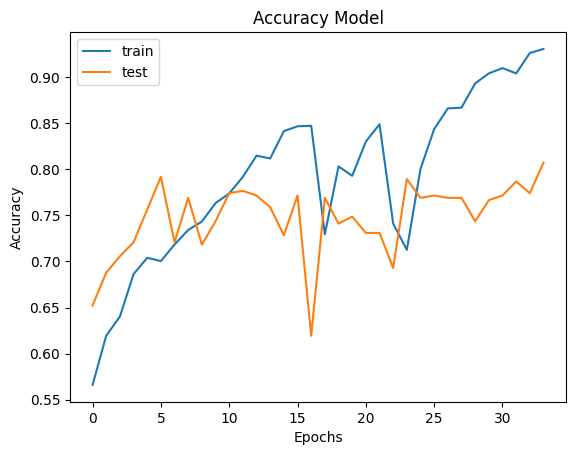

In [73]:
# Data Visualization for model Accuracy
plt.plot(history_bilstm_best_params.history['accuracy'])
plt.plot(history_bilstm_best_params.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')

plt.show()

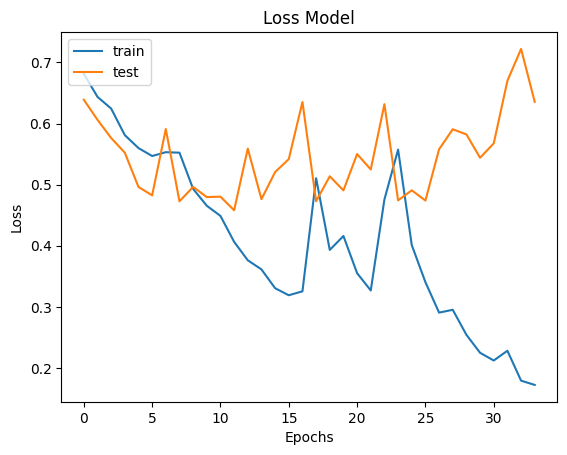

In [74]:
# Data Visualization for model Loss
plt.plot(history_bilstm_best_params.history['loss'])
plt.plot(history_bilstm_best_params.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')

plt.show()

<h2>Saving Bi-LSTM Model</h2>

In [70]:
model_bilstm_best_params.save('Model/bestModelBiLSTM.h5')
print('The ML Model has been successfully saved')

The ML Model has been successfully saved


<h1>Create LSTM Architecture</h1>

<h2>Train Model LSTM (Parameter embedding_size = 50)</h2>

In [28]:
model_lstm_embedsize_50 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_50D.shape[0], embed_matrix_50D.shape[1], input_length=maxlen, weights=[embed_matrix_50D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_embedsize_50.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_embedsize_50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           311850    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 378,779
Trainable params: 66,929
Non-trainable params: 311,850
_________________________________________________________________


In [29]:
history_lstm_embedsize_50 = model_lstm_embedsize_50.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=10,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/10
113/113 - 6s - loss: 0.6935 - accuracy: 0.4933 - val_loss: 0.6933 - val_accuracy: 0.4695 - 6s/epoch - 53ms/step
Epoch 2/10
113/113 - 4s - loss: 0.6935 - accuracy: 0.4856 - val_loss: 0.6936 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 3/10
113/113 - 4s - loss: 0.6936 - accuracy: 0.4945 - val_loss: 0.6927 - val_accuracy: 0.5305 - 4s/epoch - 31ms/step
Epoch 4/10
113/113 - 4s - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6922 - val_accuracy: 0.5305 - 4s/epoch - 31ms/step
Epoch 5/10
113/113 - 4s - loss: 0.6934 - accuracy: 0.4978 - val_loss: 0.6943 - val_accuracy: 0.4695 - 4s/epoch - 31ms/step
Epoch 6/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.5094 - val_loss: 0.6924 - val_accuracy: 0.5305 - 4s/epoch - 31ms/step
Epoch 7/10
113/113 - 4s - loss: 0.6935 - accuracy: 0.4958 - val_loss: 0.6928 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 8/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.4889 - val_loss: 0.6928 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 9/10
113/1

<h2>Train Model LSTM (Parameter embedding_size = 100)</h2>

In [30]:
model_lstm_embedsize_100 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_embedsize_100.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_embedsize_100.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          623700    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 710,629
Trainable params: 86,929
Non-trainable params: 623,700
_________________________________________________________________


In [31]:
history_lstm_embedsize_100 = model_lstm_embedsize_100.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=10,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/10
113/113 - 6s - loss: 0.6930 - accuracy: 0.5155 - val_loss: 0.6985 - val_accuracy: 0.4695 - 6s/epoch - 51ms/step
Epoch 2/10
113/113 - 4s - loss: 0.6938 - accuracy: 0.4909 - val_loss: 0.6942 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 3/10
113/113 - 4s - loss: 0.6936 - accuracy: 0.4834 - val_loss: 0.6935 - val_accuracy: 0.4695 - 4s/epoch - 34ms/step
Epoch 4/10
113/113 - 4s - loss: 0.6935 - accuracy: 0.4914 - val_loss: 0.6935 - val_accuracy: 0.4695 - 4s/epoch - 34ms/step
Epoch 5/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.4947 - val_loss: 0.6934 - val_accuracy: 0.4695 - 4s/epoch - 31ms/step
Epoch 6/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6936 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 7/10
113/113 - 4s - loss: 0.6935 - accuracy: 0.4958 - val_loss: 0.6927 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 8/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.5017 - val_loss: 0.6933 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 9/10
113/1

<h2>Train Model LSTM (Parameter embedding_size = 150)</h2>

In [32]:
model_lstm_embedsize_150 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_embedsize_150.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_embedsize_150.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 150)          935550    
                                                                 
 lstm_2 (LSTM)               (None, 100)               100400    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                6464      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,042,479
Trainable params: 106,929
Non-trainable params: 935,550
_________________________________________________________________


In [33]:
history_lstm_embedsize_150 = model_lstm_embedsize_150.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=10,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/10
113/113 - 6s - loss: 0.6937 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.4695 - 6s/epoch - 53ms/step
Epoch 2/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.4958 - val_loss: 0.6929 - val_accuracy: 0.5305 - 4s/epoch - 34ms/step
Epoch 3/10
113/113 - 4s - loss: 0.6935 - accuracy: 0.4925 - val_loss: 0.6938 - val_accuracy: 0.4695 - 4s/epoch - 37ms/step
Epoch 4/10
113/113 - 4s - loss: 0.6934 - accuracy: 0.5033 - val_loss: 0.6939 - val_accuracy: 0.4695 - 4s/epoch - 39ms/step
Epoch 5/10
113/113 - 4s - loss: 0.6935 - accuracy: 0.4997 - val_loss: 0.6939 - val_accuracy: 0.4695 - 4s/epoch - 36ms/step
Epoch 6/10
113/113 - 4s - loss: 0.6935 - accuracy: 0.4972 - val_loss: 0.6936 - val_accuracy: 0.4695 - 4s/epoch - 35ms/step
Epoch 7/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6941 - val_accuracy: 0.4695 - 4s/epoch - 38ms/step
Epoch 8/10
113/113 - 4s - loss: 0.6933 - accuracy: 0.5028 - val_loss: 0.6924 - val_accuracy: 0.5305 - 4s/epoch - 35ms/step
Epoch 9/10
113/1

<h2>Train Model LSTM (Parameter epochs = 50)</h2>

<h3>Embedding Size = 50</h3>

In [34]:
model_lstm_epochs_50_50D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_50D.shape[0], embed_matrix_50D.shape[1], input_length=maxlen, weights=[embed_matrix_50D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_epochs_50_50D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_epochs_50_50D.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           311850    
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                6464      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 378,779
Trainable params: 66,929
Non-trainable params: 311,850
_________________________________________________________________


In [35]:
history_lstm_epochs_50_50D = model_lstm_epochs_50_50D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 6s - loss: 0.6937 - accuracy: 0.4953 - val_loss: 0.6928 - val_accuracy: 0.5305 - 6s/epoch - 50ms/step
Epoch 2/50
113/113 - 4s - loss: 0.6934 - accuracy: 0.5022 - val_loss: 0.6944 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 3/50
113/113 - 4s - loss: 0.6935 - accuracy: 0.4961 - val_loss: 0.6928 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 4/50
113/113 - 4s - loss: 0.6935 - accuracy: 0.4989 - val_loss: 0.6926 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 5/50
113/113 - 5s - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6917 - val_accuracy: 0.5305 - 5s/epoch - 42ms/step
Epoch 6/50
113/113 - 4s - loss: 0.6934 - accuracy: 0.4964 - val_loss: 0.6926 - val_accuracy: 0.5305 - 4s/epoch - 36ms/step
Epoch 7/50
113/113 - 4s - loss: 0.6933 - accuracy: 0.5069 - val_loss: 0.6937 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 8/50
113/113 - 4s - loss: 0.6935 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 9/50
113/1

<h3>Embedding Size = 100</h3>

In [37]:
model_lstm_epochs_50_100D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_epochs_50_100D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_epochs_50_100D.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          623700    
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                6464      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 710,629
Trainable params: 86,929
Non-trainable params: 623,700
_________________________________________________________________


In [38]:
history_lstm_epochs_50_100D = model_lstm_epochs_50_100D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 6s - loss: 0.6936 - accuracy: 0.4939 - val_loss: 0.6940 - val_accuracy: 0.4695 - 6s/epoch - 52ms/step
Epoch 2/50
113/113 - 4s - loss: 0.6934 - accuracy: 0.5006 - val_loss: 0.6946 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 3/50
113/113 - 4s - loss: 0.6933 - accuracy: 0.5114 - val_loss: 0.6941 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 4/50
113/113 - 4s - loss: 0.6936 - accuracy: 0.4909 - val_loss: 0.6936 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 5/50
113/113 - 4s - loss: 0.6933 - accuracy: 0.4942 - val_loss: 0.6931 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 6/50
113/113 - 4s - loss: 0.6934 - accuracy: 0.4928 - val_loss: 0.6932 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 7/50
113/113 - 4s - loss: 0.6933 - accuracy: 0.4983 - val_loss: 0.6936 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 8/50
113/113 - 4s - loss: 0.6933 - accuracy: 0.4931 - val_loss: 0.6932 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 9/50
113/1

<h3>Embedding Size = 150</h3>

In [39]:
model_lstm_epochs_50_150D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_epochs_50_150D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_epochs_50_150D.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 150)          935550    
                                                                 
 lstm_6 (LSTM)               (None, 100)               100400    
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                6464      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,042,479
Trainable params: 106,929
Non-trainable params: 935,550
_________________________________________________________________


In [40]:
history_lstm_epochs_50_150D = model_lstm_epochs_50_150D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 6s - loss: 0.6933 - accuracy: 0.5030 - val_loss: 0.6944 - val_accuracy: 0.4695 - 6s/epoch - 52ms/step
Epoch 2/50
113/113 - 4s - loss: 0.6937 - accuracy: 0.5011 - val_loss: 0.6937 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 3/50
113/113 - 4s - loss: 0.6935 - accuracy: 0.4964 - val_loss: 0.6924 - val_accuracy: 0.5305 - 4s/epoch - 33ms/step
Epoch 4/50
113/113 - 4s - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6923 - val_accuracy: 0.5305 - 4s/epoch - 33ms/step
Epoch 5/50
113/113 - 4s - loss: 0.6936 - accuracy: 0.4933 - val_loss: 0.6937 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 6/50
113/113 - 4s - loss: 0.6934 - accuracy: 0.4850 - val_loss: 0.6928 - val_accuracy: 0.5305 - 4s/epoch - 33ms/step
Epoch 7/50
113/113 - 4s - loss: 0.6934 - accuracy: 0.4942 - val_loss: 0.6937 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 8/50
113/113 - 4s - loss: 0.6935 - accuracy: 0.4895 - val_loss: 0.6938 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 9/50
113/1

<h2>Train Model LSTM (Parameter epochs = 100)</h2>

<h3>Embedding Size = 50</h3>

In [41]:
model_lstm_epochs_100_50D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_50D.shape[0], embed_matrix_50D.shape[1], input_length=maxlen, weights=[embed_matrix_50D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_epochs_100_50D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_epochs_100_50D.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 50)           311850    
                                                                 
 lstm_7 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                6464      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 378,779
Trainable params: 66,929
Non-trainable params: 311,850
_________________________________________________________________


In [42]:
history_lstm_epochs_100_50D = model_lstm_epochs_100_50D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 6s - loss: 0.6935 - accuracy: 0.4939 - val_loss: 0.6923 - val_accuracy: 0.5305 - 6s/epoch - 50ms/step
Epoch 2/100
113/113 - 4s - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6969 - val_accuracy: 0.4695 - 4s/epoch - 31ms/step
Epoch 3/100
113/113 - 3s - loss: 0.6935 - accuracy: 0.5080 - val_loss: 0.6945 - val_accuracy: 0.4695 - 3s/epoch - 31ms/step
Epoch 4/100
113/113 - 4s - loss: 0.6935 - accuracy: 0.4953 - val_loss: 0.6926 - val_accuracy: 0.5305 - 4s/epoch - 31ms/step
Epoch 5/100
113/113 - 4s - loss: 0.6935 - accuracy: 0.4950 - val_loss: 0.6927 - val_accuracy: 0.5305 - 4s/epoch - 31ms/step
Epoch 6/100
113/113 - 3s - loss: 0.6936 - accuracy: 0.4834 - val_loss: 0.6929 - val_accuracy: 0.5305 - 3s/epoch - 31ms/step
Epoch 7/100
113/113 - 3s - loss: 0.6935 - accuracy: 0.4920 - val_loss: 0.6929 - val_accuracy: 0.5305 - 3s/epoch - 31ms/step
Epoch 8/100
113/113 - 4s - loss: 0.6933 - accuracy: 0.4892 - val_loss: 0.6939 - val_accuracy: 0.4695 - 4s/epoch - 31ms/step
Epoch 9/

<h3>Embedding Size = 100</h3>

In [43]:
model_lstm_epochs_100_100D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_epochs_100_100D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_epochs_100_100D.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          623700    
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                6464      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 710,629
Trainable params: 86,929
Non-trainable params: 623,700
_________________________________________________________________


In [44]:
history_lstm_epochs_100_100D = model_lstm_epochs_100_100D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 6s - loss: 0.6938 - accuracy: 0.4853 - val_loss: 0.6935 - val_accuracy: 0.4695 - 6s/epoch - 53ms/step
Epoch 2/100
113/113 - 4s - loss: 0.6934 - accuracy: 0.4823 - val_loss: 0.6934 - val_accuracy: 0.4695 - 4s/epoch - 34ms/step
Epoch 3/100
113/113 - 4s - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6927 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 4/100
113/113 - 4s - loss: 0.6933 - accuracy: 0.5089 - val_loss: 0.6927 - val_accuracy: 0.5305 - 4s/epoch - 33ms/step
Epoch 5/100
113/113 - 4s - loss: 0.6936 - accuracy: 0.4803 - val_loss: 0.6922 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 6/100
113/113 - 4s - loss: 0.6937 - accuracy: 0.4958 - val_loss: 0.6926 - val_accuracy: 0.5305 - 4s/epoch - 33ms/step
Epoch 7/100
113/113 - 4s - loss: 0.6933 - accuracy: 0.4967 - val_loss: 0.6933 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 8/100
113/113 - 4s - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6930 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 9/

<h3>Embedding Size = 150</h3>

In [45]:
model_lstm_epochs_100_150D = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_150D.shape[0], embed_matrix_150D.shape[1], input_length=maxlen, weights=[embed_matrix_150D], trainable=False),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_epochs_100_150D.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_epochs_100_150D.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 150)          935550    
                                                                 
 lstm_9 (LSTM)               (None, 100)               100400    
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                6464      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,042,479
Trainable params: 106,929
Non-trainable params: 935,550
_________________________________________________________________


In [46]:
history_lstm_epochs_100_150D = model_lstm_epochs_100_150D.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=100,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/100
113/113 - 6s - loss: 0.6937 - accuracy: 0.4914 - val_loss: 0.6929 - val_accuracy: 0.5305 - 6s/epoch - 52ms/step
Epoch 2/100
113/113 - 4s - loss: 0.6936 - accuracy: 0.4914 - val_loss: 0.6946 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 3/100
113/113 - 4s - loss: 0.6935 - accuracy: 0.4903 - val_loss: 0.6933 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 4/100
113/113 - 4s - loss: 0.6934 - accuracy: 0.4956 - val_loss: 0.6939 - val_accuracy: 0.4695 - 4s/epoch - 32ms/step
Epoch 5/100
113/113 - 4s - loss: 0.6935 - accuracy: 0.4989 - val_loss: 0.6935 - val_accuracy: 0.4695 - 4s/epoch - 33ms/step
Epoch 6/100
113/113 - 4s - loss: 0.6935 - accuracy: 0.4986 - val_loss: 0.6925 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 7/100
113/113 - 4s - loss: 0.6934 - accuracy: 0.4789 - val_loss: 0.6930 - val_accuracy: 0.5305 - 4s/epoch - 33ms/step
Epoch 8/100
113/113 - 4s - loss: 0.6933 - accuracy: 0.5039 - val_loss: 0.6919 - val_accuracy: 0.5305 - 4s/epoch - 32ms/step
Epoch 9/

<h2>Train Model LSTM (Parameter Trainable = True)</h2>

In [47]:
model_lstm_trainable_true = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=True),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_lstm_trainable_true.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_trainable_true.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          623700    
                                                                 
 lstm_10 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                6464      
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 710,629
Trainable params: 710,629
Non-trainable params: 0
_________________________________________________________________


In [48]:
history_lstm_trainable_true = model_lstm_trainable_true.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50


113/113 - 7s - loss: 0.6938 - accuracy: 0.4961 - val_loss: 0.6938 - val_accuracy: 0.4695 - 7s/epoch - 65ms/step
Epoch 2/50
113/113 - 6s - loss: 0.6936 - accuracy: 0.5061 - val_loss: 0.6929 - val_accuracy: 0.5305 - 6s/epoch - 54ms/step
Epoch 3/50
113/113 - 5s - loss: 0.6939 - accuracy: 0.5008 - val_loss: 0.6939 - val_accuracy: 0.4695 - 5s/epoch - 47ms/step
Epoch 4/50
113/113 - 5s - loss: 0.6936 - accuracy: 0.4986 - val_loss: 0.6946 - val_accuracy: 0.4695 - 5s/epoch - 45ms/step
Epoch 5/50
113/113 - 5s - loss: 0.6936 - accuracy: 0.4914 - val_loss: 0.6934 - val_accuracy: 0.4695 - 5s/epoch - 44ms/step
Epoch 6/50
113/113 - 5s - loss: 0.6935 - accuracy: 0.4922 - val_loss: 0.6942 - val_accuracy: 0.4695 - 5s/epoch - 44ms/step
Epoch 7/50
113/113 - 5s - loss: 0.6934 - accuracy: 0.5150 - val_loss: 0.6916 - val_accuracy: 0.5305 - 5s/epoch - 44ms/step
Epoch 8/50
113/113 - 5s - loss: 0.6936 - accuracy: 0.5094 - val_loss: 0.6934 - val_accuracy: 0.4695 - 5s/epoch - 44ms/step
Epoch 9/50
113/113 - 5s - l

<h2>Train Model LSTM (Parameter Learning Rate = 0.0001)</h2>

In [49]:
model_lstm_learningrate_0_0001 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=True),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_lstm_learningrate_0_0001.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_learningrate_0_0001.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          623700    
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                6464      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 710,629
Trainable params: 710,629
Non-trainable params: 0
_________________________________________________________________


In [50]:
history_lstm_learningrate_0_0001 = model_lstm_learningrate_0_0001.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 7s - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5305 - 7s/epoch - 64ms/step
Epoch 2/50
113/113 - 5s - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6930 - val_accuracy: 0.5305 - 5s/epoch - 46ms/step
Epoch 3/50
113/113 - 6s - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5305 - 6s/epoch - 52ms/step
Epoch 4/50
113/113 - 6s - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6932 - val_accuracy: 0.4695 - 6s/epoch - 49ms/step
Epoch 5/50
113/113 - 5s - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6930 - val_accuracy: 0.5305 - 5s/epoch - 47ms/step
Epoch 6/50
113/113 - 5s - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6929 - val_accuracy: 0.5305 - 5s/epoch - 46ms/step
Epoch 7/50
113/113 - 5s - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.4695 - 5s/epoch - 46ms/step
Epoch 8/50
113/113 - 6s - loss: 0.6933 - accuracy: 0.4848 - val_loss: 0.6931 - val_accuracy: 0.5305 - 6s/epoch - 53ms/step
Epoch 9/50
113/1

<h2>Train Model LSTM (Parameter Learning Rate = 0.01)</h2>

In [51]:
model_lstm_learningrate_0_01 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=True),
        tf.keras.layers.LSTM(100),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_lstm_learningrate_0_01.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_learningrate_0_01.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          623700    
                                                                 
 lstm_12 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                6464      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 710,629
Trainable params: 710,629
Non-trainable params: 0
_________________________________________________________________


In [52]:
history_lstm_learningrate_0_01 = model_lstm_learningrate_0_01.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 8s - loss: 0.6967 - accuracy: 0.5089 - val_loss: 0.6913 - val_accuracy: 0.5305 - 8s/epoch - 71ms/step
Epoch 2/50
113/113 - 5s - loss: 0.6935 - accuracy: 0.5022 - val_loss: 0.6988 - val_accuracy: 0.4492 - 5s/epoch - 45ms/step
Epoch 3/50
113/113 - 5s - loss: 0.6980 - accuracy: 0.5006 - val_loss: 0.6924 - val_accuracy: 0.5330 - 5s/epoch - 46ms/step
Epoch 4/50
113/113 - 5s - loss: 0.6951 - accuracy: 0.4986 - val_loss: 0.6926 - val_accuracy: 0.5305 - 5s/epoch - 46ms/step
Epoch 5/50
113/113 - 5s - loss: 0.6940 - accuracy: 0.4878 - val_loss: 0.6924 - val_accuracy: 0.5305 - 5s/epoch - 46ms/step
Epoch 6/50
113/113 - 5s - loss: 0.6923 - accuracy: 0.5100 - val_loss: 0.6935 - val_accuracy: 0.4975 - 5s/epoch - 46ms/step
Epoch 7/50
113/113 - 5s - loss: 0.6761 - accuracy: 0.5729 - val_loss: 0.6231 - val_accuracy: 0.7386 - 5s/epoch - 46ms/step
Epoch 8/50
113/113 - 5s - loss: 0.6246 - accuracy: 0.6824 - val_loss: 0.6087 - val_accuracy: 0.7030 - 5s/epoch - 46ms/step
Epoch 9/50
113/1

<h2>Train Model LSTM (Parameter Hidden Size = 128)</h2>

In [53]:
model_lstm_hidden_128 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=True),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_lstm_hidden_128.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_hidden_128.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 100)          623700    
                                                                 
 lstm_13 (LSTM)              (None, 128)               117248    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 749,269
Trainable params: 749,269
Non-trainable params: 0
_________________________________________________________________


In [54]:
history_lstm_hidden_128 = model_lstm_hidden_128.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 8s - loss: 0.7007 - accuracy: 0.4983 - val_loss: 0.6927 - val_accuracy: 0.5305 - 8s/epoch - 70ms/step
Epoch 2/50
113/113 - 6s - loss: 0.6938 - accuracy: 0.4870 - val_loss: 0.6934 - val_accuracy: 0.4695 - 6s/epoch - 51ms/step
Epoch 3/50
113/113 - 6s - loss: 0.6939 - accuracy: 0.4986 - val_loss: 0.6947 - val_accuracy: 0.4695 - 6s/epoch - 53ms/step
Epoch 4/50
113/113 - 6s - loss: 0.6934 - accuracy: 0.5014 - val_loss: 0.6943 - val_accuracy: 0.4695 - 6s/epoch - 53ms/step
Epoch 5/50
113/113 - 6s - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.4695 - 6s/epoch - 53ms/step
Epoch 6/50
113/113 - 6s - loss: 0.6936 - accuracy: 0.4945 - val_loss: 0.6937 - val_accuracy: 0.4695 - 6s/epoch - 52ms/step
Epoch 7/50
113/113 - 6s - loss: 0.6936 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5305 - 6s/epoch - 51ms/step
Epoch 8/50
113/113 - 6s - loss: 0.6939 - accuracy: 0.5039 - val_loss: 0.6929 - val_accuracy: 0.5305 - 6s/epoch - 51ms/step
Epoch 9/50
113/1

<h2>Train Model LSTM (Parameter Hidden Size = 200)</h2>

In [55]:
model_lstm_hidden_200 = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(embed_matrix_100D.shape[0], embed_matrix_100D.shape[1], input_length=maxlen, weights=[embed_matrix_100D], trainable=True),
        tf.keras.layers.LSTM(200),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Create Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_lstm_hidden_200.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

model_lstm_hidden_200.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 100)          623700    
                                                                 
 lstm_14 (LSTM)              (None, 200)               240800    
                                                                 
 dropout_14 (Dropout)        (None, 200)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                12864     
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 877,429
Trainable params: 877,429
Non-trainable params: 0
_________________________________________________________________


In [56]:
history_lstm_hidden_200 = model_lstm_hidden_200.fit(
        X_train_resampled,
        y_train_resampled,
        epochs=50,
        validation_data=(X_test_padded, y_test),
        verbose=2
)

Epoch 1/50
113/113 - 11s - loss: 0.7095 - accuracy: 0.4859 - val_loss: 0.6933 - val_accuracy: 0.4695 - 11s/epoch - 95ms/step
Epoch 2/50
113/113 - 8s - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.4695 - 8s/epoch - 72ms/step
Epoch 3/50
113/113 - 8s - loss: 0.6934 - accuracy: 0.4861 - val_loss: 0.6939 - val_accuracy: 0.4695 - 8s/epoch - 70ms/step
Epoch 4/50
113/113 - 8s - loss: 0.6935 - accuracy: 0.4947 - val_loss: 0.6937 - val_accuracy: 0.4695 - 8s/epoch - 70ms/step
Epoch 5/50
113/113 - 8s - loss: 0.6936 - accuracy: 0.4942 - val_loss: 0.6948 - val_accuracy: 0.4695 - 8s/epoch - 72ms/step
Epoch 6/50
113/113 - 8s - loss: 0.6937 - accuracy: 0.4956 - val_loss: 0.6923 - val_accuracy: 0.5305 - 8s/epoch - 72ms/step
Epoch 7/50
113/113 - 8s - loss: 0.6935 - accuracy: 0.5022 - val_loss: 0.6935 - val_accuracy: 0.4695 - 8s/epoch - 71ms/step
Epoch 8/50
113/113 - 9s - loss: 0.6935 - accuracy: 0.4895 - val_loss: 0.6931 - val_accuracy: 0.5305 - 9s/epoch - 77ms/step
Epoch 9/50
113

<h2>Best Parameters LSTM</h2>

<h2>Saving LSTM Model</h2>

In [57]:
model_lstm_learningrate_0_01.save('Model/bestModelLSTM.h5')
print('The ML Model has been successfully saved')

The ML Model has been successfully saved


<h2>Visualization</h2>

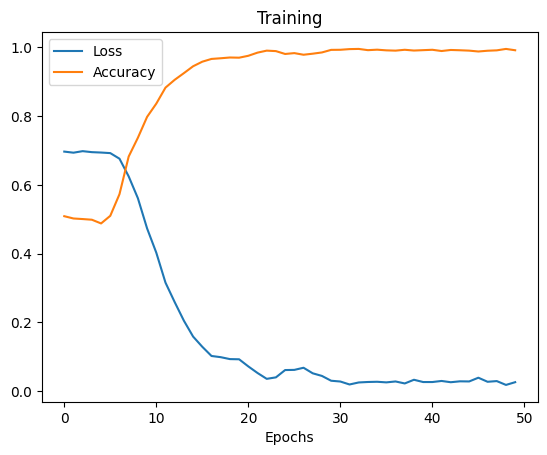

In [86]:
# Data Visualization for model Training
plt.plot(history_lstm_learningrate_0_01.history['loss'])
plt.plot(history_lstm_learningrate_0_01.history['accuracy'])
plt.title('Training')
plt.xlabel('Epochs')
plt.legend(['Loss','Accuracy'], loc='upper left')

plt.show()

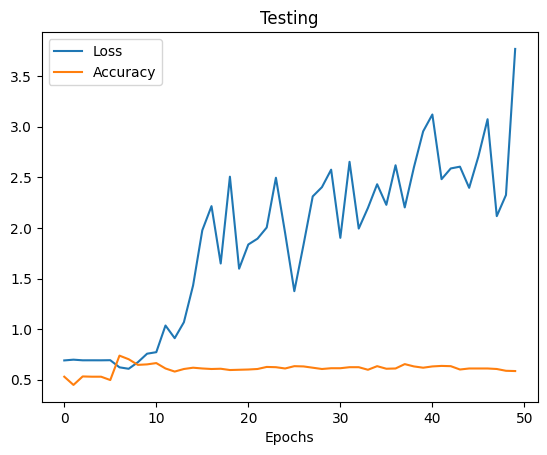

In [87]:
# Data Visualization for model Testing
plt.plot(history_lstm_learningrate_0_01.history['val_loss'])
plt.plot(history_lstm_learningrate_0_01.history['val_accuracy'])
plt.title('Testing')
plt.xlabel('Epochs')
plt.legend(['Loss','Accuracy'], loc='upper left')

plt.show()

<h1>Create SVM Model</h1>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

In [15]:
vectorizer = CountVectorizer(binary=True)

vectorizer.fit(list(X_train) + list(X_test))

X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [22]:
svc_polyKernel = svm.SVC(kernel='poly', probability=True)
svc_rbfKernel = svm.SVC(kernel='rbf', probability=True)
svc_linearKernel = svm.SVC(kernel='linear', probability=True)

prob_polyKernel = svc_polyKernel.fit(X_train_vec, y_train).predict_proba(X_test_vec)
prob_rbfKernel = svc_rbfKernel.fit(X_train_vec, y_train).predict_proba(X_test_vec)
prob_linearKernel = svc_linearKernel.fit(X_train_vec, y_train).predict_proba(X_test_vec)

y_pred_svm_poly = svc_polyKernel.predict(X_test_vec)
y_pred_svm_rbf = svc_rbfKernel.predict(X_test_vec)
y_pred_svm_linear = svc_linearKernel.predict(X_test_vec)

In [26]:
print(f'Accuracy Poly Kernel : {round(accuracy_score(y_test, y_pred_svm_poly), 2)}\n')
print(f'Accuracy RBF Kernel: {round(accuracy_score(y_test, y_pred_svm_rbf), 2)}\n')
print(f'Accuracy Linear Kernel: {round(accuracy_score(y_test, y_pred_svm_linear), 2)}\n')

Accuracy Poly Kernel : 0.59

Accuracy RBF Kernel: 0.59

Accuracy Linear Kernel: 0.54



In [77]:
y_pred_svm_poly

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

<h1>Pengujian Performansi</h1>

In [44]:
from sklearn.metrics import confusion_matrix

<h2>Bi-LSTM</h2>

In [72]:
modelBiLSTM = load_model('Model/bestModelBiLSTM.h5')

threshold = 0.5
# score = modelBiLSTM.evaluate(X_test_padded, y_test, verbose=0)

predict = modelBiLSTM.predict(X_test_padded)

predictions = [1 if output >= threshold else 0 for output in predict]

print(predictions)

13/13 [==============================] - 2s 24ms/step
[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 

In [73]:
df_evaluate_bilstm = pd.DataFrame(y_test, columns=['Actual'])
df_evaluate_bilstm_predict = pd.DataFrame(predictions, columns=['Predict'])
df_evaluate_bilstm = df_evaluate_bilstm.join(df_evaluate_bilstm_predict)
df_evaluate_bilstm.head()

,Actual,Predict
0,0,0
1,1,1
2,0,0
3,1,1
4,1,0


In [74]:
for i in range(len(df_evaluate_bilstm)):
  if (df_evaluate_bilstm.iloc[i]['Predict'] == 1 and df_evaluate_bilstm.iloc[i]['Actual'] == 1):
    df_evaluate_bilstm.loc[i, 'Category'] = 'TP'
  elif (df_evaluate_bilstm.iloc[i]['Predict'] == 0 and df_evaluate_bilstm.iloc[i]['Actual'] == 0):
    df_evaluate_bilstm.loc[i, 'Category'] = 'TN'
  elif (df_evaluate_bilstm.iloc[i]['Predict'] == 1 and df_evaluate_bilstm.iloc[i]['Actual'] == 0):
    df_evaluate_bilstm.loc[i, 'Category'] = 'FP'
  elif (df_evaluate_bilstm.iloc[i]['Predict'] == 0 and df_evaluate_bilstm.iloc[i]['Actual'] == 1):
    df_evaluate_bilstm.loc[i, 'Category'] = 'FN'

In [75]:
df_evaluate_bilstm.head()

,Actual,Predict,Category
0,0,0,TN
1,1,1,TP
2,0,0,TN
3,1,1,TP
4,1,0,FN


In [76]:
TP_bilstm = len(df_evaluate_bilstm[df_evaluate_bilstm['Category']=='TP'])
TN_bilstm = len(df_evaluate_bilstm[df_evaluate_bilstm['Category']=='TN'])
FP_bilstm = len(df_evaluate_bilstm[df_evaluate_bilstm['Category']=='FP'])
FN_bilstm = len(df_evaluate_bilstm[df_evaluate_bilstm['Category']=='FN'])

accuracy_bilstm = round((TP_bilstm + TN_bilstm) / (TP_bilstm + TN_bilstm + FP_bilstm + FN_bilstm), 2) * 100
precision_bilstm = round(TP_bilstm / (TP_bilstm + FP_bilstm), 2) * 100
recall_bilstm = round(TP_bilstm / (TP_bilstm + FN_bilstm), 2) * 100
f_measure_bilstm = round(2 * precision_bilstm * recall_bilstm / (precision_bilstm + recall_bilstm), 2)

In [77]:
print(f'TP: {TP_bilstm}')
print(f'TN: {TN_bilstm}')
print(f'FP: {FP_bilstm}')
print(f'FN: {FN_bilstm}')

TP: 151
TN: 167
FP: 42
FN: 34


In [78]:
print(f'Accuracy Bi-LSTM: {accuracy_bilstm}\n')
print(f'Precision Bi-LSTM: {precision_bilstm}\n')
print(f'Recall Bi-LSTM: {recall_bilstm}\n')
print(f'F1-Score Bi-LSTM: {f_measure_bilstm}\n')

Accuracy Bi-LSTM: 81.0

Precision Bi-LSTM: 78.0

Recall Bi-LSTM: 82.0

F1-Score Bi-LSTM: 79.95



<h2>LSTM</h2>

In [79]:
modelLSTM = load_model('Model/bestModelLSTM.h5')

threshold = 0.5
# score = modelBiLSTM.evaluate(X_test_padded, y_test, verbose=0)

predict_LSTM = modelLSTM.predict(X_test_padded)

predictions_LSTM = [1 if output >= threshold else 0 for output in predict_LSTM]

print(predictions_LSTM)

13/13 [==============================] - 1s 17ms/step
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 

In [80]:
df_evaluate_lstm = pd.DataFrame(y_test, columns=['Actual'])
df_evaluate_lstm_predict = pd.DataFrame(predictions_LSTM, columns=['Predict'])
df_evaluate_lstm = df_evaluate_lstm.join(df_evaluate_lstm_predict)
df_evaluate_lstm.head()

,Actual,Predict
0,0,0
1,1,1
2,0,1
3,1,1
4,1,0


In [81]:
for i in range(len(df_evaluate_lstm)):
  if (df_evaluate_lstm.iloc[i]['Predict'] == 1 and df_evaluate_lstm.iloc[i]['Actual'] == 1):
    df_evaluate_lstm.loc[i, 'Category'] = 'TP'
  elif (df_evaluate_lstm.iloc[i]['Predict'] == 0 and df_evaluate_lstm.iloc[i]['Actual'] == 0):
    df_evaluate_lstm.loc[i, 'Category'] = 'TN'
  elif (df_evaluate_lstm.iloc[i]['Predict'] == 1 and df_evaluate_lstm.iloc[i]['Actual'] == 0):
    df_evaluate_lstm.loc[i, 'Category'] = 'FP'
  elif (df_evaluate_lstm.iloc[i]['Predict'] == 0 and df_evaluate_lstm.iloc[i]['Actual'] == 1):
    df_evaluate_lstm.loc[i, 'Category'] = 'FN'

df_evaluate_lstm.head()

,Actual,Predict,Category
0,0,0,TN
1,1,1,TP
2,0,1,FP
3,1,1,TP
4,1,0,FN


In [82]:
TP_lstm = len(df_evaluate_lstm[df_evaluate_lstm['Category']=='TP'])
TN_lstm = len(df_evaluate_lstm[df_evaluate_lstm['Category']=='TN'])
FP_lstm = len(df_evaluate_lstm[df_evaluate_lstm['Category']=='FP'])
FN_lstm = len(df_evaluate_lstm[df_evaluate_lstm['Category']=='FN'])

accuracy_lstm = round((TP_lstm + TN_lstm) / (TP_lstm + TN_lstm + FP_lstm + FN_lstm), 2) * 100
precision_lstm = round(TP_lstm / (TP_lstm + FP_lstm), 2) * 100
recall_lstm = round(TP_lstm / (TP_lstm + FN_lstm), 2) * 100
f_measure_lstm = round(2 * precision_lstm * recall_lstm / (precision_lstm + recall_lstm), 2)

print(f'Accuracy LSTM: {accuracy_lstm}\n')
print(f'Precision LSTM: {precision_lstm}\n')
print(f'Recall LSTM: {recall_lstm}\n')
print(f'F1-Score LSTM: {f_measure_lstm}\n')

Accuracy LSTM: 59.0

Precision LSTM: 54.0

Recall LSTM: 79.0

F1-Score LSTM: 64.15



In [83]:
print(f'TP: {TP_lstm}')
print(f'TN: {TN_lstm}')
print(f'FP: {FP_lstm}')
print(f'FN: {FN_lstm}')

TP: 146
TN: 85
FP: 124
FN: 39


<h2>SVM</h2>

In [84]:
df_evaluate_svm = pd.DataFrame(y_test, columns=['Actual'])

In [85]:
df_evaluate_svm_predict = pd.DataFrame(y_pred_svm_poly, columns=['Predict'])

In [86]:
df_evaluate_svm = df_evaluate_svm.join(df_evaluate_svm_predict)

In [87]:
df_evaluate_svm.head()

,Actual,Predict
0,0,1
1,1,0
2,0,0
3,1,0
4,1,1


In [88]:
for i in range(len(df_evaluate_svm)):
  if (df_evaluate_svm.iloc[i]['Predict'] == 1 and df_evaluate_svm.iloc[i]['Actual'] == 1):
    df_evaluate_svm.loc[i, 'Category'] = 'TP'
  elif (df_evaluate_svm.iloc[i]['Predict'] == 0 and df_evaluate_svm.iloc[i]['Actual'] == 0):
    df_evaluate_svm.loc[i, 'Category'] = 'TN'
  elif (df_evaluate_svm.iloc[i]['Predict'] == 1 and df_evaluate_svm.iloc[i]['Actual'] == 0):
    df_evaluate_svm.loc[i, 'Category'] = 'FP'
  elif (df_evaluate_svm.iloc[i]['Predict'] == 0 and df_evaluate_svm.iloc[i]['Actual'] == 1):
    df_evaluate_svm.loc[i, 'Category'] = 'FN'

In [89]:
df_evaluate_svm.head()

,Actual,Predict,Category
0,0,1,FP
1,1,0,FN
2,0,0,TN
3,1,0,FN
4,1,1,TP


In [35]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_svm)

array([[170,  39],
       [124,  61]], dtype=int64)

In [90]:
TP = len(df_evaluate_svm[df_evaluate_svm['Category']=='TP'])
TN = len(df_evaluate_svm[df_evaluate_svm['Category']=='TN'])
FP = len(df_evaluate_svm[df_evaluate_svm['Category']=='FP'])
FN = len(df_evaluate_svm[df_evaluate_svm['Category']=='FN'])

accuracy_svm = round((TP + TN) / (TP + TN + FP + FN), 2) * 100
precision_svm = round(TP / (TP + FP), 2) * 100
recall_svm = round(TP / (TP + FN), 2) * 100
f_measure_svm = round(2 * precision_svm * recall_svm / (precision_svm + recall_svm), 2)

In [91]:
TP_svm = TP
TN_svm = TN
FP_svm = FP
FN_svm = FN

print(f'TP SVM : {TP_svm}\n')
print(f'TN SVM : {TN_svm}\n')
print(f'FP SVM : {FP_svm}\n')
print(f'FN SVM : {FN_svm}\n')

TP SVM : 61

TN SVM : 170

FP SVM : 39

FN SVM : 124



In [92]:
print(f'Accuracy SVM : {accuracy_svm}%\n')
print(f'Precision SVM : {precision_svm}%\n')
print(f'Recall SVM : {recall_svm}%\n')
print(f'F1-Score SVM : {f_measure_svm}%')

Accuracy SVM : 59.0%

Precision SVM : 61.0%

Recall SVM : 33.0%

F1-Score SVM : 42.83%


<h1>Data Visualization for Each Accuracy</h1>

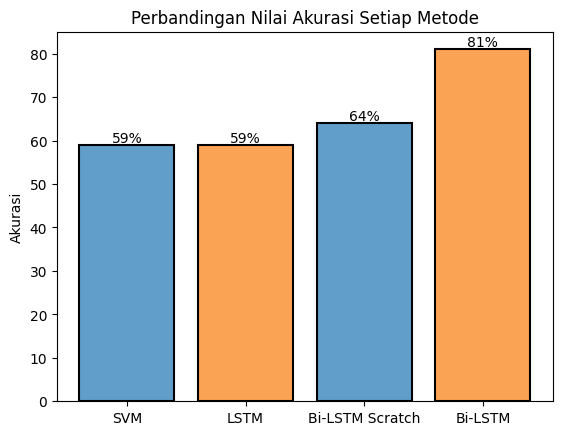

In [103]:
data = ['SVM', 'LSTM', 'Bi-LSTM Scratch', 'Bi-LSTM']
value = [accuracy_svm, accuracy_lstm, 64.0, accuracy_bilstm]

plt.bar(data, value, color=[(0.38, 0.62, 0.79), (0.98, 0.64, 0.33)], edgecolor='black', linewidth=1.5)

for i in range(len(data)):
    plt.text(data[i], value[i], f'{str(int(value[i]))}%', ha='center', va='bottom')

plt.ylabel('Akurasi')
plt.title('Perbandingan Nilai Akurasi Setiap Metode')

plt.show()